In [ ]:
! pip install pydlm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import RobustScaler
from keras.models import Sequential
from pydlm import dlm, trend, seasonality, dynamic
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, mean_squared_error

In [ ]:
data = pd.read_csv('/content/BNB-USD.csv')

In [ ]:
data.corr().style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

<ipython-input-51-0ec218d4fe38>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,Open,High,Low,Close,Adj Close,Volume
Open,1.0,0.99893,0.99821,0.99769,0.99769,0.66409
High,0.99893,1.0,0.99756,0.99883,0.99883,0.68471
Low,0.99821,0.99756,1.0,0.99876,0.99876,0.6435
Close,0.99769,0.99883,0.99876,1.0,1.0,0.66889
Adj Close,0.99769,0.99883,0.99876,1.0,1.0,0.66889
Volume,0.66409,0.68471,0.6435,0.66889,0.66889,1.0


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df = df[['Close','High']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [ ]:
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [ ]:
#Train model dlm
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
high_feature = []
for price in train_data['High']:
  high_feature.append([price])
print(high_feature)
# Define the DLM model
myDLM = dlm(y_train)
# Add a linear trend component and add a first-order trend (linear trending) with prior covariance 1.0
myDLM = myDLM + trend(1, name='lineTrend', w=1.0)
myDLM = myDLM + autoReg(degree=1, data=y_train, name='ar1', w=1e7)
myDLM = myDLM + dynamic(features=high_feature, discount=1, name='High')
model.fit()

[[2.13701], [2.11566], [2.38115], [2.57703], [2.73179], [2.77881], [2.91443], [2.86899], [2.86734], [2.69544], [2.82448], [2.7783], [2.87505], [3.15874], [4.41125], [4.72541], [6.75043], [6.22132], [6.54532], [5.78863], [5.69816], [5.21274], [5.13451], [5.28568], [6.95522], [10.6221], [11.3022], [10.1964], [9.53485], [8.7611], [8.83912], [8.70057], [9.12259], [9.58078], [9.53849], [16.717699], [23.5082], [22.7691], [19.2167], [20.320299], [17.707899], [23.1525], [24.9121], [23.666901], [22.2535], [23.604799], [19.634001], [15.5378], [15.9596], [15.6351], [16.652399], [16.248899], [14.4503], [13.9627], [14.1906], [14.1374], [13.5905], [13.4414], [13.8125], [13.6727], [12.7736], [11.4132], [11.3944], [10.4585], [10.2724], [9.74564], [8.55172], [8.55554], [9.22497], [8.72122], [9.88927], [10.3632], [9.34548], [9.40375], [9.34794], [10.6498], [11.2839], [11.2016], [11.8707], [11.7003], [11.1949], [11.1927], [10.1942], [9.80875], [9.73303], [9.83537], [9.49441], [10.065], [11.0962], [11.182

/usr/local/lib/python3.10/dist-packages/pydlm/modeler/autoReg.py:75: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [ ]:
# Quá trình testing, and predict test
x_test= []
for price in test_data['High']:
  x_test.append([price])
print(np.array(x_test).shape)
y_test = np.array(test_data['Close'])
y_test_pred = myDLM.predictN(date = myDLM.n-1, N=len(x_test),featureDict={'High': x_test})
y_test_pred = y_test_pred[0]

(201, 1)


In [ ]:
mae = mean_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MAPE:", mape * 100)
print("RMSE:", rmse)

MAE: 19.938595047182087
MAPE: 7.330477451627216
RMSE: 22.060516145918445


In [ ]:
#Quá trình validate, and predict val
y_val = np.array(val_data['High'])
x_val= []
for price in val_data['High']:
  x_val.append([price])
print(type(x_val))
size = test_size + val_size
y_pred_val = myDLM.predictN(featureDict={'High': x_val}, N = len(x_val))
y_pred_val = y_pred_val[0]
print(y_pred_val)

<class 'list'>
[13230.454785775804, 27417.999652570536, 22529.868104080895, 24622.362703314364, 24057.61418049088, 24083.396681527134, 24152.466562231617, 24062.610479645817, 23985.836479490863, 24064.35971379619, 24756.538469502637, 24537.033959498374, 24507.44721835357, 24557.157495308664, 24594.914044061865, 24826.061347201692, 24454.139104645907, 24610.620754407708, 24735.584286989484, 24716.74344294431, 24666.24726740425, 24724.63033162478, 24680.165968368714, 25466.20980685303, 25619.18930239733, 25077.489519496652, 24912.012995969057, 24232.32970677231, 24491.319579300078, 24404.873569583906, 24662.734939609923, 24483.091372338655, 24502.06224137853, 24546.97379573611, 24499.233804179647, 24521.753420102745, 24587.72517302881, 24617.79005434944, 24414.972163542407, 24371.644074355878, 24388.22432829804, 24377.812799570023, 24393.485145847306, 24535.266557821145, 24498.452952077336, 24737.921798824333, 24581.125666067946, 24759.787432221325, 24691.188102771684, 24848.28847293476,

In [ ]:
# Thực hiện dự đoán 30 ngày tiếp theo của feature 'High' dựa trên Linear Regression
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(np.array(train_data.index).reshape(-1,1), train_data['High'])

#Quá trình testing
x_test_LR = np.array(test_data.index).reshape(-1, 1)
y_test_LR = np.array(test_data['High'])
y_pred_LR = LR_model.predict(x_test_LR)

# Quá trình Validate
x_val_LR= np.array(val_data.index).reshape(-1, 1)
y_val_LR = np.array(val_data)
y_pred_val_LR =  LR_model.predict(x_val_LR)

# Predict the prices for the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

feature_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
feature_next_30_days = LR_model.predict(feature_next_30_days)

print(feature_next_30_days)

[52497.21594157 52524.58225666 52551.94857175 52579.31488685
 52606.68120194 52634.04751703 52661.41383212 52688.78014722
 52716.14646231 52743.5127774  52770.8790925  52798.24540759
 52825.61172268 52852.97803778 52880.34435287 52907.71066796
 52935.07698306 52962.44329815 52989.80961324 53017.17592833
 53044.54224343 53071.90855852 53099.27487361 53126.64118871
 53154.0075038  53181.37381889 53208.74013399 53236.10644908
 53263.47276417 53290.83907927]


In [ ]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x = []
for price in feature_next_30_days:
  x.append([price])
print(type(x))
num_dims = np.ndim(x)
print(num_dims)
y_next_30_days = myDLM.predictN(featureDict={'High': x}, N = 30)
y_next_30_days = y_next_30_days[0]
print(y_next_30_days)

<class 'list'>
2
[51109.8562942705, 52838.014431092255, 52285.803622805164, 52514.460973759764, 52475.7251542253, 52528.55294472921, 52550.02655117552, 52582.236790411924, 52610.77047778982, 52640.563129112226, 52669.92467262641, 52699.43384065606, 52728.89245753086, 52758.36838466914, 52787.83838424309, 52817.3104135966, 52846.78174789144, 52876.253320195625, 52905.724810998145, 52935.196329709324, 52964.66783886373, 52994.13935129066, 53023.61086259697, 53053.08237428703, 53082.55388584567, 53112.02539744931, 53141.49690903757, 53170.96842063106, 53200.439932222784, 53229.9114438151]


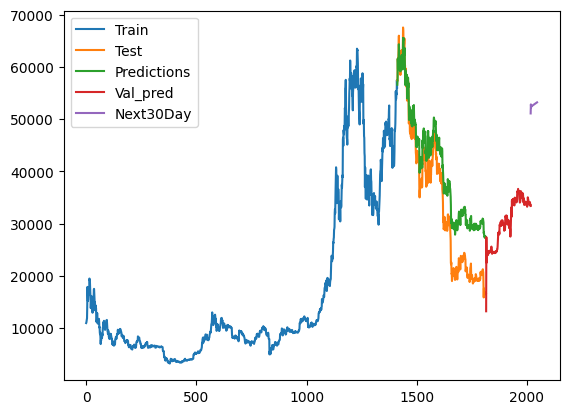

In [ ]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index,y_test_pred)
plt.plot(val_data.index,y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val_pred','Next30Day'])
plt.show()